In [1]:
# Import dependencies

#pybaseball is a baseball-specific scraping tool that can pull statistics from several different websites
# Read about it here: https://jamesrledoux.com/projects/open-source/introducing-pybaseball/
import pybaseball
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup
from pybaseball import batting_stats


# More basic dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Some extra ones for fun
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as mt

In [2]:
# Import the data
stat_data2018 = pd.read_csv("resources/sprint_speed_2018.csv")
stat_data2018 = stat_data2018.rename(index=str, columns= {"player_id": "key_mlbam"})

stat_data2019 = pd.read_csv("resources/sprint_speed2019.csv")
stat_data2019 = stat_data2019.rename(index=str, columns= {"player_id": "key_mlbam"})

# NOTE: This was necessary the first time the data was imported.
# An earlier version of this code replaced the original data with the cleaned version and as such, using this over and over would no longer work
# stat_data2018['first_name'] = stat_data2018[' first_name'].str[1:]
# stat_data2018['first_name'] = stat_data2018[' first_name'].str[1:]

In [3]:
# retrieve data on only players who have 50+ plate appearances this year
bat_data2018 = batting_stats(2018, qual=50)
bat_data2019 = batting_stats(2019, qual=50)

In [4]:
fangraphsids_db = pybaseball.playerid_reverse_lookup(stat_data2018.key_mlbam, key_type='mlbam')
fangraphsids_db2 = pybaseball.playerid_reverse_lookup(stat_data2019.key_mlbam, key_type='mlbam')

Gathering player lookup table. This may take a moment.
Gathering player lookup table. This may take a moment.


In [5]:
labelled18 = stat_data2018.merge(fangraphsids_db, how='left', on='key_mlbam' )
labelled18 = labelled18.drop(columns=['team', 'age'])
labelled19 = stat_data2019.merge(fangraphsids_db2, how='left', on='key_mlbam' )
labelled19 = labelled19.drop(columns=['team', 'age'])

In [6]:
labelled18['Name'] = labelled18['first_name'] + " " + labelled18['last_name']
labelled19['Name'] = labelled19['first_name'] + " " + labelled19['last_name']

In [7]:
total2018 = labelled18.merge(bat_data2018, how='left', on='Name')
total2019 = labelled19.merge(bat_data2019, how='left', on='Name')

In [8]:
CFers = total2018[total2018.position.str.endswith('F')]

In [9]:
total2018.head()

,last_name,first_name,key_mlbam,team_id,position,competitive_runs,hp_to_1b,sprint_speed,name_last,name_first,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,Buxton,Byron,621439,142,CF,35,3.98,30.5,buxton,byron,...,-1.59,NaN,0.367,0.694,0.532,0.554,0.832,0.737,0.504,22.6
1,Sierra,Magneuris,642423,146,CF,63,3.91,30.2,sierra,magneuris,...,-3.16,NaN,0.411,0.615,0.513,0.595,0.901,0.777,0.496,22.0
2,Quinn,Roman,596451,143,CF,56,3.88,30.2,quinn,roman,...,0.94,NaN,0.235,0.696,0.479,0.452,0.830,0.743,0.529,22.4
3,Engel,Adam,641553,145,CF,181,4.08,30.1,engel,adam,...,-2.48,-2.79,0.394,0.669,0.528,0.513,0.823,0.704,0.486,24.0
4,Hamilton,Billy,571740,113,CF,203,3.94,30.1,hamilton,billy,...,-1.44,-17.84,0.303,0.642,0.476,0.692,0.826,0.784,0.510,21.5


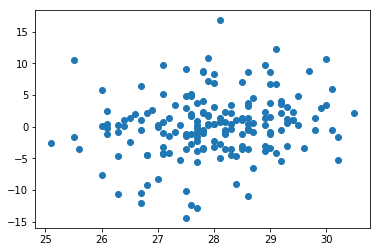

In [10]:
plt.scatter(CFers.sprint_speed, CFers.Fld)

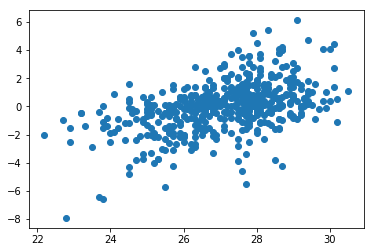

In [11]:
plt.scatter(total2018.sprint_speed, total2018.UBR)


In [12]:
test2018 = CFers[['Name', 'Fld', 'sprint_speed', 'hp_to_1b']]
test2018 = test2018.dropna(subset=['Fld', 'sprint_speed', 'hp_to_1b'])

mdl = RandomForestRegressor()


In [13]:
mdl.fit(test2018[['sprint_speed', 'hp_to_1b']], test2018.Fld)
sco = mdl.score(test2018[['sprint_speed', 'hp_to_1b']], test2018.Fld)
predict = mdl.predict(test2018[['sprint_speed', 'hp_to_1b']])


C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


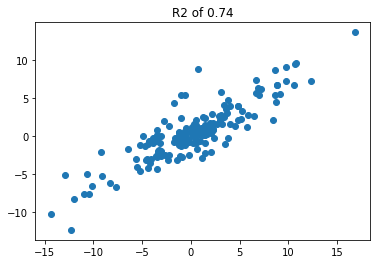

In [18]:
plt.scatter(test2018.Fld, predict)
plt.title(f'R2 of {round(sco,2)}')
plt.show()

In [15]:
test2019 = total2019[total2019.position.str.endswith('F')]
test2019 = test2019[['Name', 'Fld', 'sprint_speed', 'hp_to_1b']]
test2019 = test2019.dropna(subset=['Fld', 'sprint_speed', 'hp_to_1b'])

In [20]:
sco2 = mdl.score(test2019[['sprint_speed', 'hp_to_1b']], test2019.Fld)
predict2 = mdl.predict(test2019[['sprint_speed', 'hp_to_1b']])

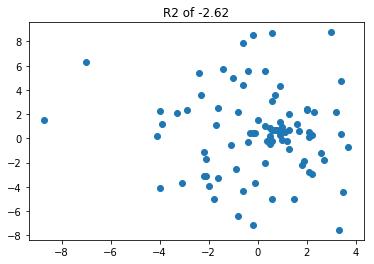

In [21]:
plt.scatter(test2019.Fld, predict2)
plt.title(f'R2 of {round(sco2,2)}')
plt.show()

In [22]:
## WELP. DOESN'T WORK, I GUESS ¯\_(ツ)_/¯.